In [1]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [9]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [12]:
# Load dataset
matches = pd.read_csv("matches (2).csv")
deliveries = pd.read_csv("deliveries.csv")

In [14]:
print('Matches:', matches.shape)
print('Deliveries:', deliveries.shape)

Matches: (1095, 20)
Deliveries: (260920, 17)


In [15]:
matches.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [16]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [17]:
# Basic Info
print('\nMatches info:')
print(matches.info())
print('\nDeliveries info:')
print(deliveries.info())


Matches info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17 

In [18]:
# Missing Values
print('\nMatches missing values:\n', matches.isnull().sum())
print('\nDeliveries missing values:\n', deliveries.isnull().sum())


Matches missing values:
 id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

Deliveries missing values:
 match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             

In [19]:
# Convert date
if 'date' in matches.columns:
    try:
        matches['date'] = pd.to_datetime(matches['date'])
    except Exception:
        # if date column contains seasons like '2007/08' fallback to string
        pass

In [21]:
# Strip whitespace in string columns that denote teams/players/venues
str_cols_matches = ['team1','team2','toss_winner','winner','city','venue','player_of_match','match_type']
for c in str_cols_matches:
    if c in matches.columns:
        matches[c] = matches[c].astype(str).str.strip()

str_cols_del = ['batting_team','bowling_team','batter','bowler','non_striker','player_dismissed','extras_type','dismissal_kind','fielder']
for c in str_cols_del:
    if c in deliveries.columns:
        deliveries[c] = deliveries[c].astype(str).str.strip()

In [22]:
# Check duplicates
dup_matches = matches.duplicated(subset=['id']).sum()
print('\nDuplicate match ids:', dup_matches)


Duplicate match ids: 0


In [ ]:
# deliveries should have match_id and over/ball
if 'match_id' in deliveries.columns:
    dup_del = deliveries.duplicated(subset=['match_id','inning','over','ball']).sum()
    print('Duplicate delivery rows (match_id,inning,over,ball):', dup_del)


In [ ]:
# Basic descriptive analysis
# - Total matches
# - Matches per season
# - Most frequent venues

In [26]:
# Total matches
total_matches = matches['id'].nunique()
print('Total unique matches:', total_matches)

Total unique matches: 1095



Matches per season:
 season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
Name: count, dtype: int64


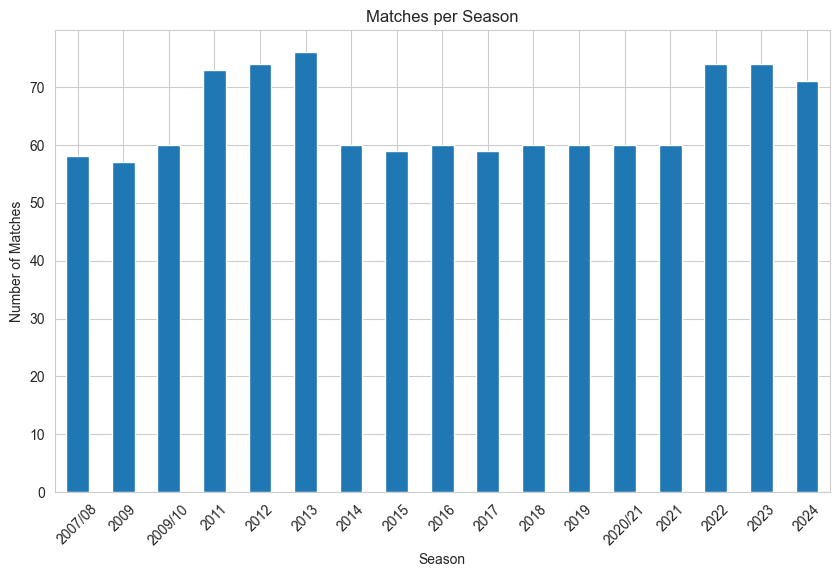

In [27]:
# Matches per season
if 'season' in matches.columns:
    matches_per_season = matches['season'].value_counts().sort_index()
    print('\nMatches per season:\n', matches_per_season)
    matches_per_season.plot(kind='bar', title='Matches per Season')
    plt.xlabel('Season')
    plt.ylabel('Number of Matches')
    plt.xticks(rotation=45)
    plt.show()


Top venues:
 venue
Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         65
Feroz Shah Kotla                              60
Rajiv Gandhi International Stadium, Uppal     49
MA Chidambaram Stadium, Chepauk               48
Sawai Mansingh Stadium                        47
Dubai International Cricket Stadium           46
Wankhede Stadium, Mumbai                      45
Punjab Cricket Association Stadium, Mohali    35
Sheikh Zayed Stadium                          29
Sharjah Cricket Stadium                       28
MA Chidambaram Stadium, Chepauk, Chennai      28
Narendra Modi Stadium, Ahmedabad              24
Maharashtra Cricket Association Stadium       22
Name: count, dtype: int64


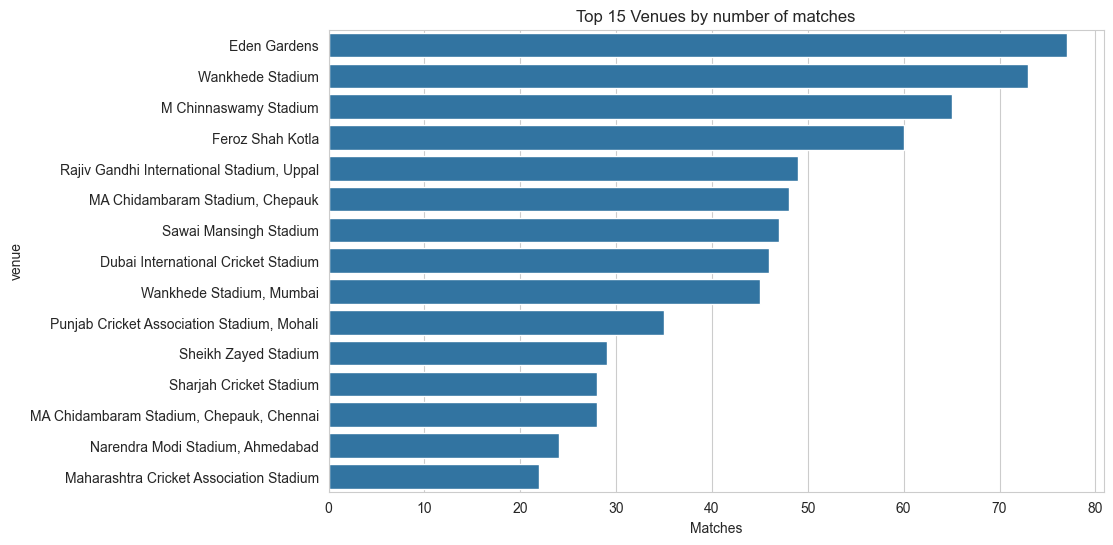

In [28]:
# Top venues
if 'venue' in matches.columns:
    top_venues = matches['venue'].value_counts().nlargest(15)
    print('\nTop venues:\n', top_venues)
    sns.barplot(y=top_venues.index, x=top_venues.values)
    plt.title('Top 15 Venues by number of matches')
    plt.xlabel('Matches')
    plt.show()

In [29]:
# Toss decision vs match outcome
# Analyze whether winning the toss gives an advantage.


Toss winner also match winner:
toss_match_same
True     554
False    541
Name: count, dtype: int64

Percentage of matches where toss-winner also won match: 50.59%

Toss decision (bat/field) win percentage:
                count  sum    win_pct
toss_decision                       
bat              391  177  45.268542
field            704  377  53.551136


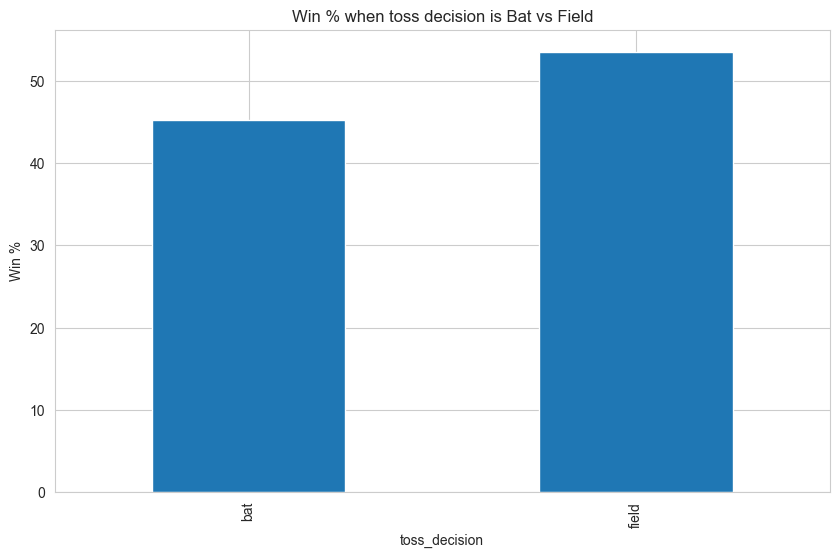

In [31]:
# Prepare toss vs winner table
if {'toss_winner','winner','toss_decision'}.issubset(matches.columns):
    matches['toss_match_same'] = matches['toss_winner'] == matches['winner']
    toss_win_counts = matches['toss_match_same'].value_counts()
    print('\nToss winner also match winner:')
    print(toss_win_counts)

# Percentage
    toss_pct = matches['toss_match_same'].mean() * 100
    print(f"\nPercentage of matches where toss-winner also won match: {toss_pct:.2f}%")
      
# Toss decision analysis
    decision_table = matches.groupby('toss_decision')['toss_match_same'].agg(['count','sum'])
    decision_table['win_pct'] = (decision_table['sum']/decision_table['count'])*100
    print('\nToss decision (bat/field) win percentage:\n', decision_table)

# Plot
    decision_table['win_pct'].plot(kind='bar', title='Win % when toss decision is Bat vs Field')
    plt.ylabel('Win %')
    plt.show()
    

In [32]:
# Top batsmen (career runs) — Using `deliveries`
# We'll aggregate runs by batter and get top run-scorers overall and per season.

,batter,batsman_runs
0,V Kohli,8014
1,S Dhawan,6769
2,RG Sharma,6630
3,DA Warner,6567
4,SK Raina,5536
5,MS Dhoni,5243
6,AB de Villiers,5181
7,CH Gayle,4997
8,RV Uthappa,4954
9,KD Karthik,4843


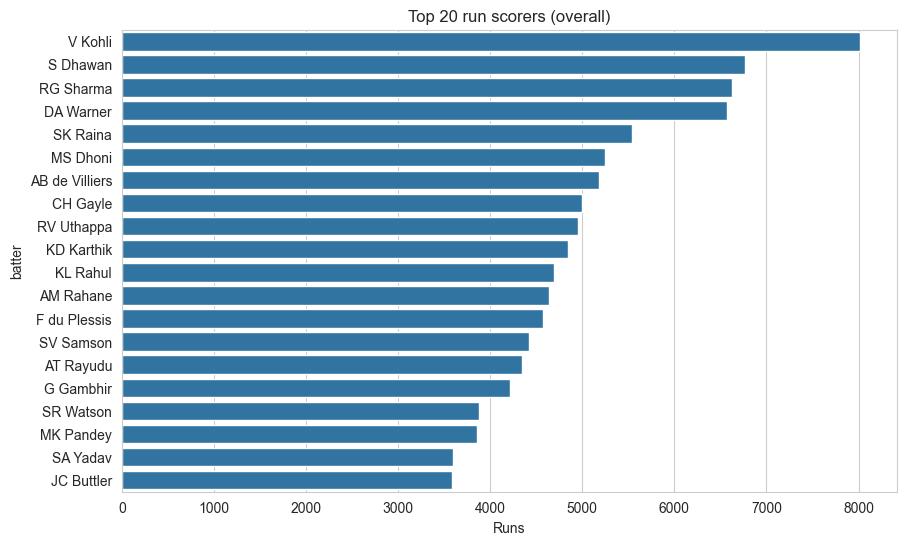

In [33]:
# Top batsmen overall
if 'batter' in deliveries.columns:
    batter_runs = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).reset_index()
    top_bats = batter_runs.head(20)
    display(top_bats)

    # Plot top 20
    sns.barplot(y=top_bats['batter'], x=top_bats['batsman_runs'])
    plt.title('Top 20 run scorers (overall)')
    plt.xlabel('Runs')
    plt.show()

In [34]:
# Top batsmen by season (requires mapping deliveries -> match season)
if 'match_id' in deliveries.columns and 'id' in matches.columns and 'season' in matches.columns:

# prepare match_id -> season map
    id_to_season = matches.set_index('id')['season'].to_dict()
    deliveries['season'] = deliveries['match_id'].map(id_to_season)
    season_top = deliveries.groupby(['season','batter'])['batsman_runs'].sum().reset_index()

# for demonstration show top for a few seasons
    example_seasons = deliveries['season'].dropna().unique()[:3]
    for s in example_seasons:
        top_in_season = season_top[season_top['season']==s].sort_values('batsman_runs', ascending=False).head(10)
        print(f"\nTop batsmen in season {s}:")
        display(top_in_season)


Top batsmen in season 2007/08:


,season,batter,batsman_runs
115,2007/08,SE Marsh,616
39,2007/08,G Gambhir,534
126,2007/08,ST Jayasuriya,514
124,2007/08,SR Watson,472
40,2007/08,GC Smith,441
10,2007/08,AC Gilchrist,436
149,2007/08,YK Pathan,435
116,2007/08,SK Raina,421
76,2007/08,MS Dhoni,414
139,2007/08,V Sehwag,406



Top batsmen in season 2009:


,season,batter,batsman_runs
229,2009,ML Hayden,572
166,2009,AC Gilchrist,495
165,2009,AB de Villiers,465
272,2009,SK Raina,434
288,2009,TM Dilshan,418
204,2009,JP Duminy,372
195,2009,HH Gibbs,371
177,2009,BJ Hodge,365
279,2009,SR Tendulkar,364
254,2009,RG Sharma,362



Top batsmen in season 2009/10:


,season,batter,batsman_runs
446,2009/10,SR Tendulkar,618
365,2009/10,JH Kallis,572
441,2009/10,SK Raina,528
437,2009/10,SC Ganguly,493
386,2009/10,M Vijay,458
348,2009/10,DPMD Jayawardene,445
308,2009/10,A Symonds,429
448,2009/10,SS Tiwary,419
420,2009/10,RG Sharma,404
402,2009/10,NV Ojha,377


In [35]:
# Top bowlers (wickets & economy)
# We'll compute wickets for bowlers and economy rate (runs conceded per over).

In [36]:
if 'bowler' in deliveries.columns:
# Wickets: count rows where is_wicket==1 and dismissal_kind not in ['run out', 'retired hurt', 'obstructing the field'] ideally
    wk_deliveries = deliveries.copy()
    
# Some deliveries may have 'is_wicket' as string '0' etc. coerce
    wk_deliveries['is_wicket'] = pd.to_numeric(wk_deliveries['is_wicket'], errors='coerce').fillna(0).astype(int)

    dismissals_to_count = ['bowled','caught','lbw','stumped','caught and bowled','hit wicket']
    wk_deliveries['wicket_counted'] = wk_deliveries.apply(lambda r: 1 if (r['is_wicket']==1 and str(r['dismissal_kind']).strip().lower() in dismissals_to_count) else 0, axis=1)

    bowler_wickets = wk_deliveries.groupby('bowler')['wicket_counted'].sum().sort_values(ascending=False).reset_index()
    top_bowlers = bowler_wickets.head(20)
    display(top_bowlers)

# Economy: runs conceded / overs bowled; note wides/no-balls add to runs but still count as legal ball? For simplicity, we'll compute total runs conceded and legal deliveries/6.
    runs_conceded = deliveries.groupby('bowler')['total_runs'].sum()
    legal_balls = deliveries[deliveries['extras_type'].isin(['wides','no ball','nan'])==False]
    
# instead, better: consider deliveries where ball is legal: deliveries where extras_type is not 'wides' and not 'no ball'
    legal_ball_mask = ~deliveries['extras_type'].isin(['wides','no ball'])
    legal_balls_count = deliveries[legal_ball_mask].groupby('bowler').size()

    econ = (runs_conceded / (legal_balls_count/6)).sort_values()
    econ = econ.reset_index().rename(columns={0:'economy','bowler':'bowler'})
    
# The above rename may be wrong shape; better compute properly:
    econ_df = (runs_conceded.reset_index().rename(columns={'total_runs':'runs_conceded'})).merge(
        legal_balls_count.reset_index().rename(columns={0:'legal_deliveries', 'index':'bowler'}),
        on='bowler', how='left')
    econ_df['overs'] = econ_df['legal_deliveries'] / 6
    econ_df['economy'] = econ_df['runs_conceded'] / econ_df['overs']
    econ_df = econ_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['economy']).sort_values('economy')
    display(econ_df.head(20))

,bowler,wicket_counted
0,YS Chahal,205
1,PP Chawla,192
2,DJ Bravo,183
3,B Kumar,181
4,SP Narine,180
5,R Ashwin,180
6,A Mishra,174
7,SL Malinga,170
8,JJ Bumrah,168
9,RA Jadeja,160


,bowler,runs_conceded,legal_deliveries,overs,economy
24,AC Gilchrist,0,1,0.166667,0.000000
364,R Ravindra,7,12,2.000000,3.500000
317,NB Singh,18,24,4.000000,4.500000
460,Sachin Baby,8,10,1.666667,4.800000
38,AM Rahane,5,6,1.000000,5.000000
125,DJ Thornely,40,42,7.000000,5.714286
260,M Manhas,42,42,7.000000,6.000000
453,SS Mundhe,6,6,1.000000,6.000000
245,LA Carseldine,6,6,1.000000,6.000000
296,MW Short,25,24,4.000000,6.250000


In [ ]:
# Player of the Match frequency

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
RA Jadeja         16
YK Pathan         16
SR Watson         16
AD Russell        15
SP Narine         15
KA Pollard        14
SK Raina          14
G Gambhir         13
KL Rahul          13
AM Rahane         13
JC Buttler        13
A Mishra          12
Rashid Khan       12
S Dhawan          12
Name: count, dtype: int64

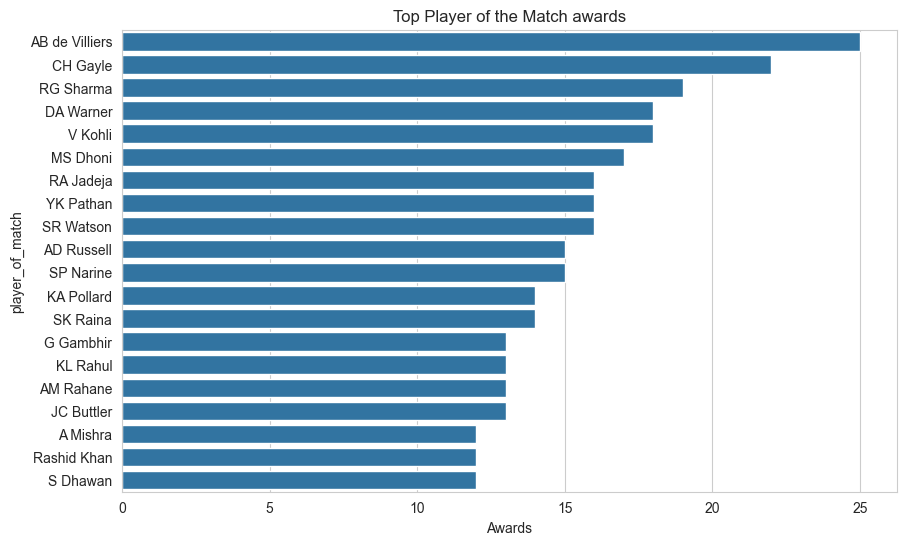

In [37]:
if 'player_of_match' in matches.columns:
    pom = matches['player_of_match'].value_counts().head(20)
    display(pom)
    sns.barplot(y=pom.index, x=pom.values)
    plt.title('Top Player of the Match awards')
    plt.xlabel('Awards')
    plt.show()

In [ ]:
# Team performance & win counts
# - Team wins overall
# - Win percentage per team

,team,wins
0,Mumbai Indians,144
1,Chennai Super Kings,138
2,Kolkata Knight Riders,131
3,Royal Challengers Bangalore,116
4,Rajasthan Royals,112
5,Kings XI Punjab,88
6,Sunrisers Hyderabad,88
7,Delhi Daredevils,67
8,Delhi Capitals,48
9,Deccan Chargers,29


,team,wins,matches_played,win_pct
6,Mumbai Indians,144,261,55.172414
3,Chennai Super Kings,138,238,57.983193
1,Kolkata Knight Riders,131,251,52.191235
0,Royal Challengers Bangalore,116,240,48.333333
5,Rajasthan Royals,112,221,50.678733
2,Kings XI Punjab,88,190,46.315789
10,Sunrisers Hyderabad,88,182,48.351648
4,Delhi Daredevils,67,161,41.614907
14,Delhi Capitals,48,91,52.747253
7,Deccan Chargers,29,75,38.666667


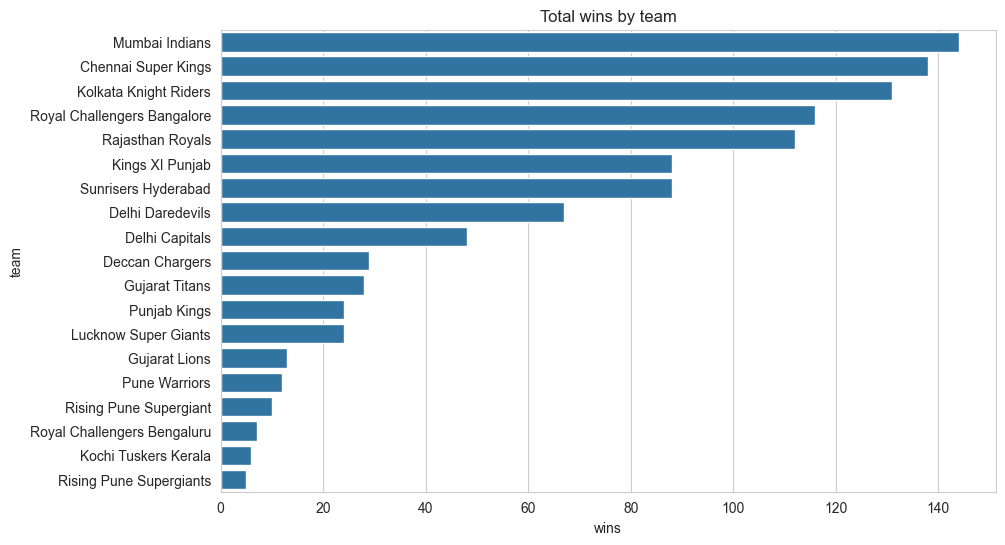

In [39]:
if 'winner' in matches.columns:
    team_wins = matches['winner'].value_counts().reset_index()
    team_wins.columns = ['team','wins']
    display(team_wins.head(20))

# Matches played by teams: count occurrences in team1 or team2
    teams = pd.unique(matches[['team1','team2']].values.ravel())
    matches_played = []
    for t in teams:
        mp = ((matches['team1']==t) | (matches['team2']==t)).sum()
        matches_played.append({'team':t,'matches_played':mp})
    matches_played = pd.DataFrame(matches_played)

    team_summary = team_wins.merge(matches_played, left_on='team', right_on='team', how='right').fillna(0)
    team_summary['win_pct'] = (team_summary['wins']/team_summary['matches_played'])*100
    team_summary = team_summary.sort_values('wins', ascending=False)
    display(team_summary)

# Plot wins
    sns.barplot(y=team_summary['team'], x=team_summary['wins'])
    plt.title('Total wins by team')
    plt.show()

In [ ]:
# Head-to-head / Rivalry

Total matches between Chennai Super Kings and Mumbai Indians : 37


winner
Mumbai Indians         20
Chennai Super Kings    17
Name: count, dtype: int64

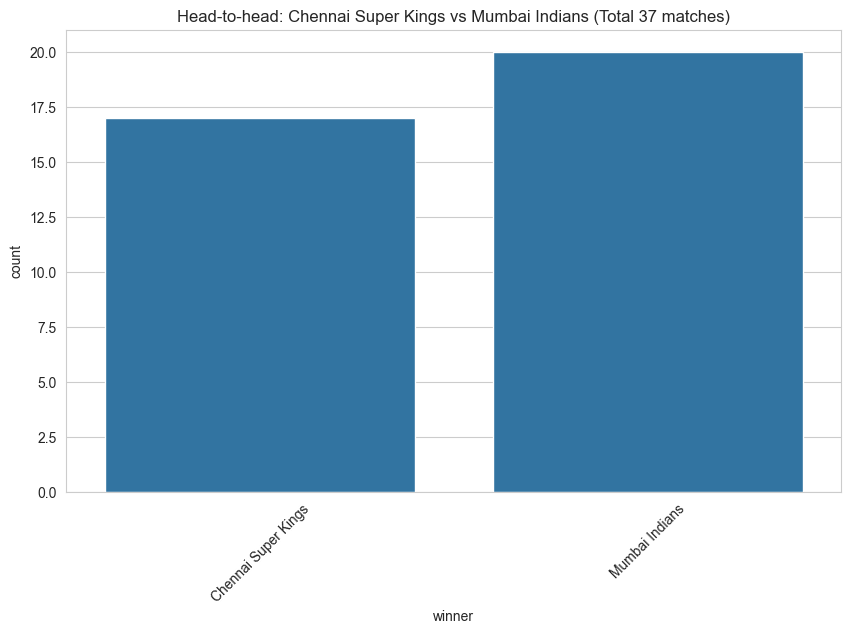

In [40]:
r1, r2 = 'Chennai Super Kings', 'Mumbai Indians'
if set([r1,r2]).issubset(matches['team1'].unique()):
    hh = matches[((matches['team1']==r1) & (matches['team2']==r2)) | ((matches['team1']==r2) & (matches['team2']==r1))]
    print('Total matches between', r1, 'and', r2, ':', hh.shape[0])
    hh_wins = hh['winner'].value_counts()
    display(hh_wins)
    sns.countplot(data=hh, x='winner')
    plt.title(f'Head-to-head: {r1} vs {r2} (Total {hh.shape[0]} matches)')
    plt.xticks(rotation=45)
    plt.show()
else:
    print('One or both teams not found in team list. Available teams sample:', matches['team1'].unique()[:10])


In [41]:
# Venue performance

,venue,winner,wins
89,Eden Gardens,Kolkata Knight Riders,45
364,Wankhede Stadium,Mumbai Indians,42
173,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,33
304,Sawai Mansingh Stadium,Rajasthan Royals,32
154,M Chinnaswamy Stadium,Royal Challengers Bangalore,29
105,Feroz Shah Kotla,Delhi Daredevils,23
276,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,20
253,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,18
182,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,10
90,Eden Gardens,Mumbai Indians,10


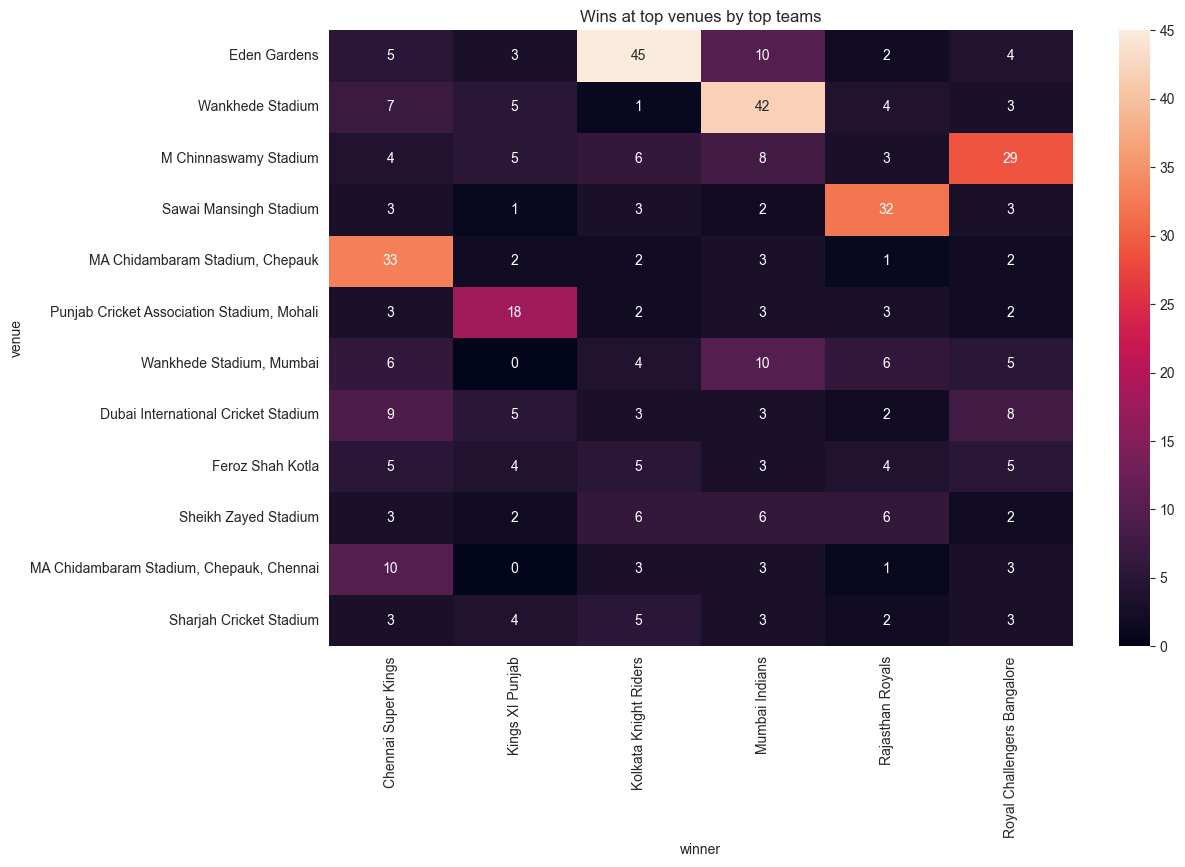

In [42]:
if 'venue' in matches.columns and 'winner' in matches.columns:
    venue_wins = matches.groupby(['venue','winner']).size().reset_index(name='wins')
# For demonstration show top 10 (venue, winner) pairs
    display(venue_wins.sort_values('wins', ascending=False).head(15))

# Visual: heatmap of wins by venue for top teams
    top_teams = team_summary['team'].head(6).tolist()
    vtop = matches[matches['winner'].isin(top_teams)]
    vt = pd.crosstab(vtop['venue'], vtop['winner'])
    vt = vt.loc[vt.sum(axis=1).nlargest(12).index]
    plt.figure(figsize=(12,8))
    sns.heatmap(vt, annot=True, fmt='d')
    plt.title('Wins at top venues by top teams')
    plt.show()

In [43]:
#  Runs by top batsmen

In [46]:
if 'batter' in deliveries.columns:
    top10 = batter_runs.head(10)
    fig = px.bar(top10, x='batter', y='batsman_runs', title='Top 10 run scorers (overall)', labels={'batsman_runs':'Runs','batter':'Batsman'})
    fig.show()

In [47]:
# Extras & their impact

extras_type
nan        246795
wides        8380
legbyes      4001
noballs      1069
byes          673
penalty         2
Name: count, dtype: int64

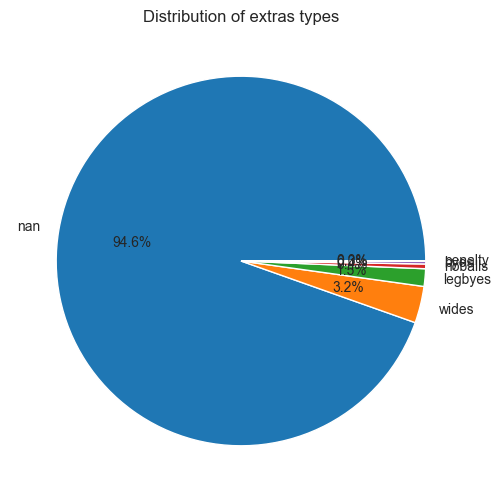

In [48]:
if 'extras_type' in deliveries.columns:
    extras = deliveries['extras_type'].value_counts()
    display(extras.head(10))
    extras.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Distribution of extras types')
    plt.ylabel('')
    plt.show()

In [50]:
# Win probability given chasing / defending
if {'match_id','inning','batting_team','total_runs'}.issubset(deliveries.columns):
    # compute innings totals
    innings = deliveries.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
# pivot to have inning 1 and 2 totals
    inn_pivot = innings.pivot(index='match_id', columns='inning', values='total_runs')
    inn_pivot = inn_pivot.rename(columns={1:'inning1_runs', 2:'inning2_runs'})

# merge with matches winners
    match_w = matches.set_index('id')[['winner']]
    inn_pivot = inn_pivot.merge(match_w, left_index=True, right_index=True, how='left')
    
# determine which team batted second (requires batting_team information)
# get batting_team for inning 2
    inning2_batting = innings[innings['inning']==2].set_index('match_id')['batting_team']
    inn_pivot['batting_team_inn2'] = inning2_batting

# who won more when chasing?
    inn_pivot['won_chasing'] = inn_pivot['winner'] == inn_pivot['batting_team_inn2']
    chase_pct = inn_pivot['won_chasing'].mean()*100
    print(f"Percentage of matches won by the team batting second (chasing): {chase_pct:.2f}%")


Percentage of matches won by the team batting second (chasing): 53.88%
